# Table: loss

**Motivation**: Device = ```cuda:1``` <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_PoissonVAE'))
from analysis.eval import sparse_score
from figures.fighelper import *
from vae.train_vae import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

## Device

In [2]:
device_idx = 1
device = f'cuda:{device_idx}'

from analysis.final import sort_fits, analyze_fits, add_nelbo_diff
from figures.table import table_entry_loss
from figures.point import nelbo_point
from analysis.stats import ttest

### Load df

In [3]:
df = pjoin(tmp_dir, 'df_main.df')
df = pd.read_pickle(df)
df = add_nelbo_diff(df)
df.shape

(150, 9)

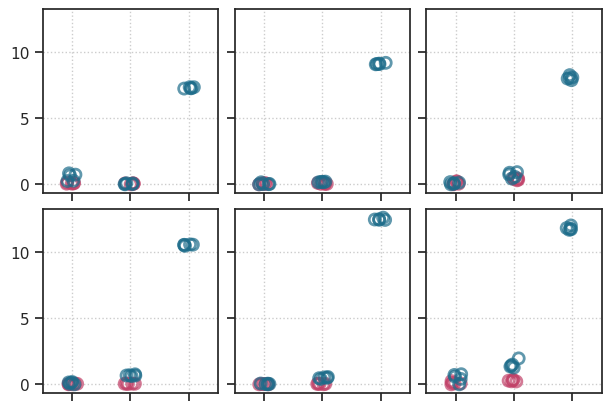

In [4]:
fig, axes = nelbo_point(df, scale=2, alpha=0.6)
# fig.savefig(pjoin(fig_dir, 'nelbo_point.pdf'), **kws_fig)

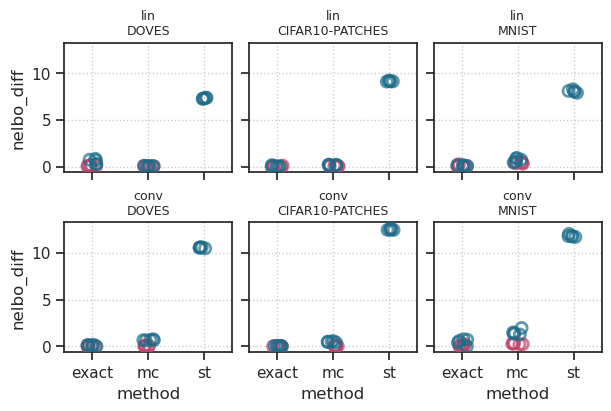

In [5]:
fig, axes = nelbo_point(df, scale=2, remove_lbls=False)

In [6]:
df.groupby(['type', 'method']).mean(numeric_only=True)

n_dims  seed    active       nelbo  nelbo_diff
type     method                                                
gaussian exact    512.0   3.0  0.170247  118.394539    0.062021
         mc       512.0   3.0  0.145638  118.430450    0.142867
poisson  exact    512.0   3.0  0.831901  123.472893    0.216889
         mc       512.0   3.0  0.782227  123.759293    0.599133
         st       512.0   3.0  0.742188  135.367767    9.887917

In [7]:
df = pjoin(tmp_dir, 'df_main.df')
df = pd.read_pickle(df)

In [8]:
group_cols = ['type', 'dataset', 'enc_type', 'method']

df_agg, df_ttest = ttest(
    df=df,
    value='nelbo',
    by=group_cols,
    test_conds=[('exact', 'mc')]
)

In [9]:
df_ttest

,type,dataset,enc_type,cond1,cond2,t,pvals,pvals_fdr_bh,reject
0,categorical,CIFAR10-PATCHES,conv,exact,mc,29.741441,7.610919e-06,3.653241e-05,True
1,categorical,CIFAR10-PATCHES,lin,exact,mc,107.020257,4.571246e-08,6.433598e-07,True
2,categorical,DOVES,conv,exact,mc,76.319655,1.766480e-07,1.326846e-06,True
3,categorical,DOVES,lin,exact,mc,102.837428,5.361332e-08,6.433598e-07,True
4,categorical,MNIST,conv,exact,mc,-0.754298,5.293873e-01,5.524041e-01,False
5,categorical,MNIST,lin,exact,mc,72.149197,2.211410e-07,1.326846e-06,True
6,gaussian,CIFAR10-PATCHES,conv,exact,mc,-1.736704,1.574435e-01,1.889322e-01,False
7,gaussian,CIFAR10-PATCHES,lin,exact,mc,-0.425670,6.922524e-01,6.922524e-01,False
8,gaussian,DOVES,conv,exact,mc,-2.090717,1.047458e-01,1.396611e-01,False
9,gaussian,DOVES,lin,exact,mc,1.843652,1.390086e-01,1.755898e-01,False


In [10]:
df_ttest.pivot(values='reject', index='type', columns=['dataset', 'enc_type'])

dataset     CIFAR10-PATCHES         DOVES         MNIST       
enc_type               conv    lin   conv    lin   conv    lin
type                                                          
categorical            True   True   True   True  False   True
gaussian              False  False  False  False   True   True
laplace                True  False  False  False  False  False
poisson                True   True   True  False   True   True

In [12]:
for model in ['poisson', 'gaussian', 'categorical', 'laplace']:
    table = table_entry_loss(model, df_agg)
    print(f"——— model: {model} ———\n")
    print(table)
    print('\n\n\n')

——— model: poisson ———

\begin{tabularx}{34mm}{CC}
    \entry{168.0}{.8} & \entry{162.4}{.2} \\ 
    \entry{167.2}{.1} & \entry{163.4}{.1} \\ 
    \entry{179.3}{.1} & \entry{179.4}{.1}
\end{tabularx}
&
\begin{tabularx}{34mm}{CC}
    \entry{167.1}{.2} & \entry{162.1}{.1} \\ 
    \entry{167.3}{.1} & \entry{162.9}{.2} \\ 
    \entry{182.3}{.1} & \entry{182.3}{.2}
\end{tabularx}
&
\begin{tabularx}{34mm}{CC}
    \entry{41.5}{.1} & \entry{39.7}{.2} \\ 
    \entry{41.7}{.2} & \entry{40.1}{.2} \\ 
    \entry{44.8}{.1} & \entry{44.2}{.1}
\end{tabularx}

——— model: gaussian ———

\begin{tabularx}{34mm}{CC}
    \entry{160.3}{.1} & \entry{154.4}{.1} \\ 
    \entry{160.3}{.1} & \entry{154.4}{.1}
\end{tabularx}
&
\begin{tabularx}{34mm}{CC}
    \entry{165.9}{.1} & \entry{149.2}{.0} \\ 
    \entry{165.9}{.1} & \entry{149.2}{.1}
\end{tabularx}
&
\begin{tabularx}{34mm}{CC}
    \entry{40.6}{.1} & \entry{40.0}{.1} \\ 
    \entry{40.7}{.1} & \entry{40.1}{.0}
\end{tabularx}

——— model: categorical ———

\begin{tabularx}{34mm}{CC}
    \entry{174.9}{.1} & \entry{186.3}{.8} \\ 
    \entry{170.5}{.1} & \entry{171.9}{.2} \\ 
    \entry{174.2}{.2} & \entry{181.1}{.3}
\end{tabularx}
&
\begin{tabularx}{34mm}{CC}
    \entry{177.1}{.1} & \entry{180.6}{.5} \\ 
    \entry{174.7}{.1} & \entry{176.5}{.1} \\ 
    \entry{180.2}{.0} & \entry{185.6}{.2}
\end{tabularx}
&
\begin{tabularx}{34mm}{CC}
    \entry{56.1}{.7} & \entry{59.1}{.0} \\ 
    \entry{39.7}{.2} & \entry{59.1}{.0} \\ 
    \entry{49.3}{.1} & \entry{63.8}{3.4}
\end{tabularx}

——— model: laplace ———

\begin{tabularx}{34mm}{CC}
    \entry{167.3}{.0} & \entry{159.0}{.2} \\ 
    \entry{167.3}{.0} & \entry{159.2}{.2}
\end{tabularx}
&
\begin{tabularx}{34mm}{CC}
    \entry{170.1}{.1} & \entry{154.3}{.1} \\ 
    \entry{170.1}{.1} & \entry{154.5}{.1}
\end{tabularx}
&
\begin{tabularx}{34mm}{CC}
    \entry{42.1}{.1} & \entry{41.0}{.0} \\ 
    \entry{42.1}{.0} & \entry{41.0}{.0}
\end{tabularx}